# Task 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
data=fetch_california_housing()
housing=pd.DataFrame(data['data'],columns=data['feature_names'])
housing['target']=data['target']
housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## Task 1.1

a)  **Notice:**

  * The range, magnitude and even sign vary from feature to feature.
  * The modality also differs from feature to feature. Some features like `Longitude` and `Latitude` demonstrate trait of bimodality.
  * The skewness(symmetry) of distributions also differs. Features like `AveRooms`, `AveBedrms`, `AveOccup` are clearly more concentrated towards the lower range and could have very large outliers. In comparison, the distribution of `HouseAge` is more uniform.
  
b)   Based on the observation, we might need to **pay attention to**:
  * scale the range, magnitude or even fix the sign of the feature value so that each feature can contribute similarly to the model performance. Also make sure one feature is not over-penalized over another when we try to regularize the model parameters.
  * In some cases (like neural network), we might prefer the feature value to be zero centered so that the gradient stream in the back propagation can be more effective.
  * Take care of the outliers (like the ones in `AveRooms`, `AveBedrms`, `AveOccup`) to prevent it from distracting the model from main character.
  * In the case of linear regression, we might also need to pay attention to the correlation between features. Features with high correlation might unstablize the outcome.
  

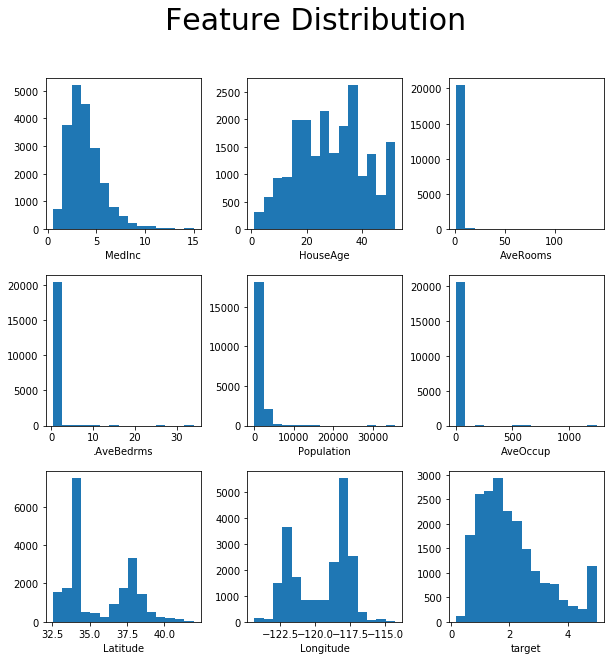

In [3]:
fig,ax=plt.subplots(3,3,figsize=(10,10))

ax[0,0].hist(housing.MedInc,bins=15)
ax[0,0].set_xlabel('MedInc')

ax[0,1].hist(housing.HouseAge,bins=15)
ax[0,1].set_xlabel('HouseAge')

ax[0,2].hist(housing.AveRooms,bins=15)
ax[0,2].set_xlabel('AveRooms')

ax[1,0].hist(housing.AveBedrms,bins=15)
ax[1,0].set_xlabel('.AveBedrms')

ax[1,1].hist(housing.Population,bins=15)
ax[1,1].set_xlabel('Population')

ax[1,2].hist(housing.AveOccup,bins=15)
ax[1,2].set_xlabel('AveOccup')

ax[2,0].hist(housing.Latitude,bins=15)
ax[2,0].set_xlabel('Latitude')

ax[2,1].hist(housing.Longitude,bins=15)
ax[2,1].set_xlabel('Longitude')

ax[2,2].hist(housing.target,bins=15)
ax[2,2].set_xlabel('target')

fig.suptitle("Feature Distribution",fontsize=30)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

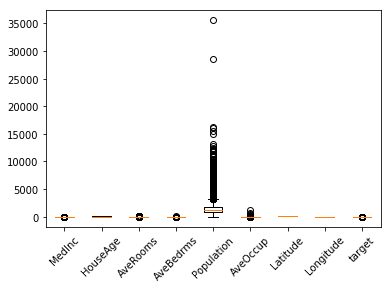

In [4]:
plt.boxplot(housing.values)
plt.xticks(range(1,housing.values.shape[1]+1),housing.columns,rotation=45)
plt.show()

## Task 1.2

### Matrix Plot

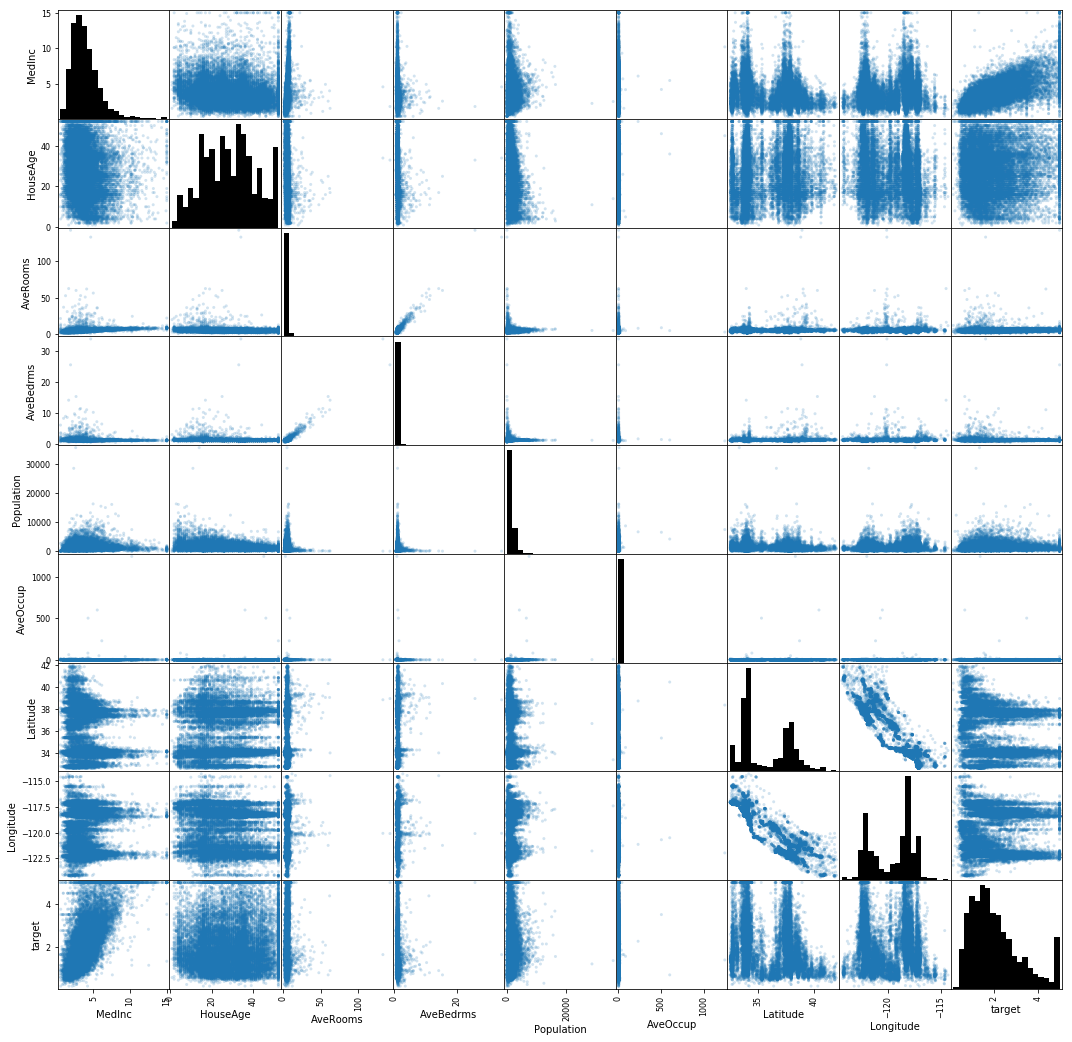

In [5]:
pd.plotting.scatter_matrix(housing,figsize=(18,18),hist_kwds={'bins':20,'color':'k'},alpha=0.2)
plt.show()

### Target Feature Dependency

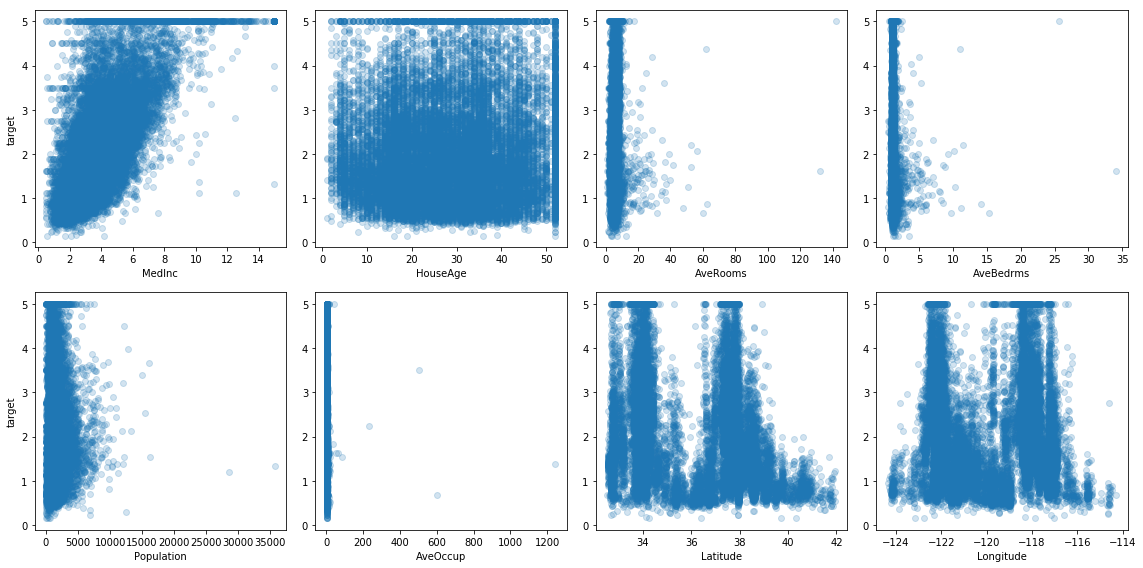

In [6]:
cols=housing.columns
fig,ax=plt.subplots(2,4,figsize=(16,8))
for i in range(len(cols)-1):
    j=0
    if i>=4:
        j=1
    ax[j,i%4].scatter(housing[cols[i]],housing[cols[-1]],alpha=0.2)
    ax[j,i%4].set_xlabel(cols[i])
    if i%4==0:
        ax[j,i%4].set_ylabel(cols[-1])
plt.tight_layout()
plt.show()

## Task 1.3

In [7]:
scaler=StandardScaler()
cols=housing.columns
X,y=housing[cols[:-1]],housing[cols[-1]]
x_train,x_test,y_train,y_test=train_test_split(X,y)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

### 1.3.1 OLS 

**a) Before scale:**

In [8]:
score_nonscale=np.mean(cross_val_score(LinearRegression(),x_train,y_train,cv=10))
print("The mean cross validation score of OLS is %5f before scale" %score_nonscale)

The mean cross validation score of OLS is 0.602711 before scale


**b) After scale**

In [9]:
score_scale=np.mean(cross_val_score(LinearRegression(),x_train_scaled,y_train,cv=10))
print("The mean cross validation score of OLS is %5f after scale" %score_scale)

The mean cross validation score of OLS is 0.602711 after scale


**Threfore, for OLS the mean cross validation scores before and after scaling are the same.**

### 1.3.2 Ridge

**a) Before scaled:**

In [10]:
score_nonscale=np.mean(cross_val_score(Ridge(),x_train,y_train,cv=10))
print("The mean cross validation score of Ridge is %.6f before scale" %score_nonscale)

The mean cross validation score of Ridge is 0.602727 before scale


**b) After scaled**

In [11]:
score_scale=np.mean(cross_val_score(Ridge(),x_train_scaled,y_train,cv=10))
print("The mean cross validation score of Ridge is %.6f after scale" %score_scale)

The mean cross validation score of Ridge is 0.602719 after scale


**Threfore, for Ridge the mean cross validation scores after scaling is almost the same as before.**

### 1.3.3 Lasso

**a) Before scaled**

In [12]:
score_nonscale=np.mean(cross_val_score(Lasso(),x_train,y_train,cv=10))
print("The mean cross validation score of Lasso is %.6f before scale" %score_nonscale)

The mean cross validation score of Lasso is 0.287425 before scale


**b) After scaled**

In [13]:
score_scale=np.mean(cross_val_score(Lasso(),x_train_scaled,y_train,cv=10))
print("The mean cross validation score of Lasso is %.6f after scale" %score_scale)

The mean cross validation score of Lasso is -0.000300 after scale


**Threfore, for Lasso the mean cross validation scores after scaling is worse than before.**

### 1.3.4 Elastic Net

**a) Before scaled**

In [14]:
score_nonscale=np.mean(cross_val_score(ElasticNet(),x_train,y_train,cv=10))
print("The mean cross validation score of ElasticNet is %.6f before scale" %score_nonscale)

The mean cross validation score of ElasticNet is 0.425558 before scale


**b) After scaled**

In [15]:
score_scale=np.mean(cross_val_score(ElasticNet(),x_train_scaled,y_train,cv=10))
print("The mean cross validation score of ElasticNet is %.6f after scale" %score_scale)

The mean cross validation score of ElasticNet is 0.206965 after scale


**Threfore, for ElasticNet the mean cross validation scores after scaling is worse than before.**

## Task 1.4

### 1.4.1 Ridge

**a) Before scaled**

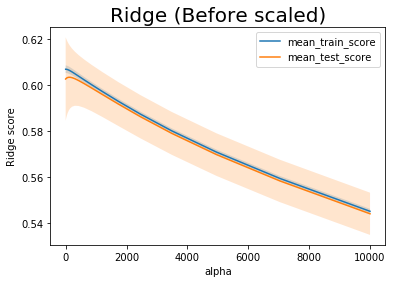

In [16]:
param_range=np.logspace(-5,4,60)
param_grid_ridge={'alpha':param_range}
grid_ridge=GridSearchCV(Ridge(),param_grid=param_grid_ridge,cv=10)
grid_ridge.fit(x_train,y_train)

fig,ax=plt.subplots()
ax.plot(param_range,grid_ridge.cv_results_['mean_train_score'],label='mean_train_score')
ax.fill_between(param_range,grid_ridge.cv_results_['mean_train_score']-grid_ridge.cv_results_['std_train_score'],grid_ridge.cv_results_['mean_train_score']+grid_ridge.cv_results_['std_train_score'],alpha=0.2)
ax.plot(param_range,grid_ridge.cv_results_['mean_test_score'],label='mean_test_score')
ax.fill_between(param_range,grid_ridge.cv_results_['mean_test_score']-grid_ridge.cv_results_['std_test_score'],grid_ridge.cv_results_['mean_test_score']+grid_ridge.cv_results_['std_test_score'],alpha=0.2)
ax.set_xlabel('alpha');ax.set_ylabel('Ridge score')
ax.set_title('Ridge (Before scaled)',fontsize=20)
ax.legend()
plt.show()

In [17]:
score_ridge=np.mean(cross_val_score(Ridge(),x_train,y_train,cv=10))
print("For the unscaled data, the mean cross validation score of Ridge is %.6f before parameter tuning" %score_ridge)
print("For the unscaled data, the mean cross validation score of Ridge is %.6f after parameter tuning" %grid_ridge.best_score_)

For the unscaled data, the mean cross validation score of Ridge is 0.602727 before parameter tuning
For the unscaled data, the mean cross validation score of Ridge is 0.603459 after parameter tuning


**For the unscaled data, the mean cross validation score is a little larger after tuning. Therefore, the result is slightly better after tuning the parameter.**

**b) After scaled**

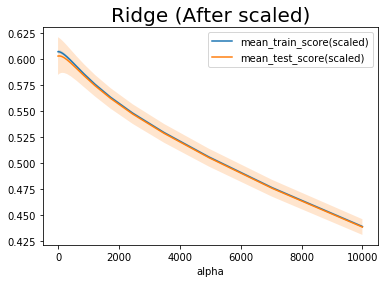

In [18]:
param_range=np.logspace(-5,4,60)
param_ridge_scaled={'alpha':param_range}
grid_ridge_scaled=GridSearchCV(Ridge(),param_grid=param_ridge_scaled,cv=10)
grid_ridge_scaled.fit(x_train_scaled,y_train)

fig,ax=plt.subplots()
ax.plot(param_range,grid_ridge_scaled.cv_results_['mean_train_score'],label='mean_train_score(scaled)')
ax.fill_between(param_range,grid_ridge_scaled.cv_results_['mean_train_score']-grid_ridge_scaled.cv_results_['std_train_score'],grid_ridge_scaled.cv_results_['mean_train_score']+grid_ridge_scaled.cv_results_['std_train_score'],alpha=0.2)
ax.plot(param_range,grid_ridge_scaled.cv_results_['mean_test_score'],label='mean_test_score(scaled)')
ax.fill_between(param_range,grid_ridge_scaled.cv_results_['mean_test_score']-grid_ridge_scaled.cv_results_['std_test_score'],grid_ridge_scaled.cv_results_['mean_test_score']+grid_ridge_scaled.cv_results_['std_test_score'],alpha=0.2)
ax.set_xlabel('alpha')
ax.set_title('Ridge (After scaled)',fontsize=20)
plt.legend()
plt.show()

In [19]:
score_ridge_scaled=np.mean(cross_val_score(Ridge(),x_train_scaled,y_train,cv=10))
print("For the scaled data, the mean cross validation score of Ridge is %.6f before parameter tuning" %score_ridge_scaled)
print("For the scaled data, the mean cross validation score of Ridge is %.6f after parameter tuning" %grid_ridge_scaled.best_score_)

For the scaled data, the mean cross validation score of Ridge is 0.602719 before parameter tuning
For the scaled data, the mean cross validation score of Ridge is 0.602845 after parameter tuning


**For the scaled data, the mean cross validation score is a little larger after tuning. Therefore, the result is slightly better after tuning the parameter.**

**Also, we can see that the mean cross validation score with tuned parameter before and after the data scaling is almost the same**

### 1.4.2 Lasso

**a) Before scaled**

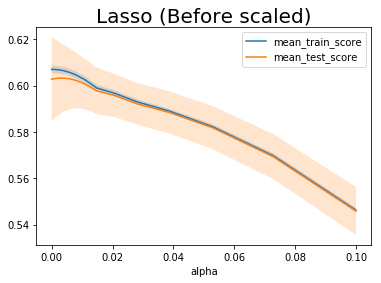

In [20]:
param_range=np.logspace(-5,-1,30)
param_grid_Lasso={'alpha':param_range}
grid_lasso=GridSearchCV(Lasso(),param_grid=param_grid_Lasso,cv=10)
grid_lasso.fit(x_train,y_train)

fig,ax=plt.subplots()
ax.plot(param_range,grid_lasso.cv_results_['mean_train_score'],label='mean_train_score')
ax.fill_between(param_range,grid_lasso.cv_results_['mean_train_score']-grid_lasso.cv_results_['std_train_score'],grid_lasso.cv_results_['mean_train_score']+grid_lasso.cv_results_['std_train_score'],alpha=0.2)
ax.plot(param_range,grid_lasso.cv_results_['mean_test_score'],label='mean_test_score')
ax.fill_between(param_range,grid_lasso.cv_results_['mean_test_score']-grid_lasso.cv_results_['std_test_score'],grid_lasso.cv_results_['mean_test_score']+grid_lasso.cv_results_['std_test_score'],alpha=0.2)
ax.set_xlabel('alpha')
ax.set_title('Lasso (Before scaled)',fontsize=20)
ax.legend()
plt.show()

In [21]:
score_lasso=np.mean(cross_val_score(Lasso(),x_train,y_train,cv=10))
print("For the unscaled data, the mean cross validation score of Lasso is %.6f before parameter tuning" %score_lasso)
print("For the unscaled data, the mean cross validation score of Lasso is %.6f after parameter tuning" %grid_lasso.best_score_)

For the unscaled data, the mean cross validation score of Lasso is 0.287425 before parameter tuning
For the unscaled data, the mean cross validation score of Lasso is 0.603179 after parameter tuning


**For the unscaled data, the mean cross validation score is larger after tuning. Therefore, the result gets better after tuning the parameter.**

**b) After scaled**

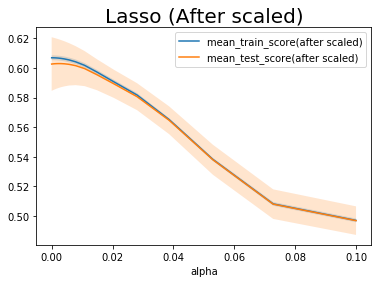

In [22]:
param_range=np.logspace(-5,-1,30)
param_lasso_scaled={'alpha':param_range}
grid_lasso_scaled=GridSearchCV(Lasso(),param_grid=param_lasso_scaled,cv=10)
grid_lasso_scaled.fit(x_train_scaled,y_train)

fig,ax=plt.subplots()
ax.plot(param_range,grid_lasso_scaled.cv_results_['mean_train_score'],label='mean_train_score(after scaled)')
ax.fill_between(param_range,grid_lasso_scaled.cv_results_['mean_train_score']-grid_lasso_scaled.cv_results_['std_train_score'],grid_lasso_scaled.cv_results_['mean_train_score']+grid_lasso_scaled.cv_results_['std_train_score'],alpha=0.2)
ax.plot(param_range,grid_lasso_scaled.cv_results_['mean_test_score'],label='mean_test_score(after scaled)')
ax.fill_between(param_range,grid_lasso_scaled.cv_results_['mean_test_score']-grid_lasso_scaled.cv_results_['std_test_score'],grid_lasso_scaled.cv_results_['mean_test_score']+grid_lasso_scaled.cv_results_['std_test_score'],alpha=0.2)
ax.set_xlabel('alpha')
ax.set_title('Lasso (After scaled)',fontsize=20)
plt.legend()
plt.show()

In [23]:
score_lasso_scaled=np.mean(cross_val_score(Lasso(),x_train_scaled,y_train,cv=10))
print("For the scaled data, the mean cross validation score of Lasso is %.6f before parameter tuning" %score_lasso_scaled)
print("For the scaled data, the mean cross validation score of Lasso is %.6f after parameter tuning" %grid_lasso_scaled.best_score_)

For the scaled data, the mean cross validation score of Lasso is -0.000300 before parameter tuning
For the scaled data, the mean cross validation score of Lasso is 0.603019 after parameter tuning


**For the scaled data, the mean cross validation score is much larger after tuning. Therefore, the result gets better after tuning the parameter.**

**Also, we can see that the mean cross validation score with tuned parameter before and after the data scaling is almost the same**

### 1.4.3 Elastic Net

**a) Before scaled**

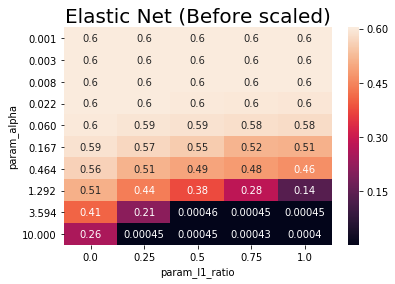

In [24]:
param_grid_EN={'alpha':np.logspace(-3,1,10),'l1_ratio':np.linspace(0,1,5)}
grid_EN=GridSearchCV(ElasticNet(),param_grid=param_grid_EN,cv=10)
grid_EN.fit(x_train,y_train)
res=pd.pivot_table(pd.DataFrame(grid_EN.cv_results_),'mean_test_score',index='param_alpha',columns='param_l1_ratio')

sns.heatmap(res,annot=True)
plt.yticks([i+0.5 for i in range(10)],['%.3f'%i for i in np.logspace(-3,1,10)])
plt.title('Elastic Net (Before scaled)',fontsize=20)
plt.show()

In [25]:
score_EN=np.mean(cross_val_score(ElasticNet(),x_train,y_train,cv=10))
print("For the unscaled data, the mean cross validation score of ElasticNet is %.6f before parameter tuning" %score_EN)
print("For the unscaled data, the mean cross validation score of ElaticsNet is %.6f after parameter tuning" %grid_EN.best_score_)

For the unscaled data, the mean cross validation score of ElasticNet is 0.425558 before parameter tuning
For the unscaled data, the mean cross validation score of ElaticsNet is 0.603463 after parameter tuning


**For the unscaled data, the mean cross validation score is larger after tuning. Therefore, in ElasticNet the result turns out to be better after tuning the parameter.**

**b) After scaled**

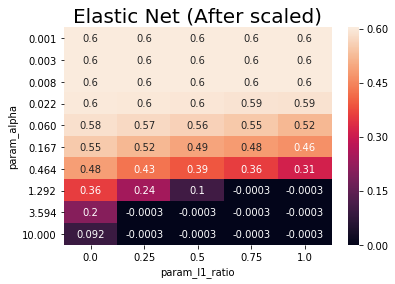

In [26]:
param_EN_scaled={'alpha':np.logspace(-3,1,10),'l1_ratio':np.linspace(0,1,5)}
grid_EN_scaled=GridSearchCV(ElasticNet(),param_grid=param_EN_scaled,cv=10)
grid_EN_scaled.fit(x_train_scaled,y_train)
res_scaled=pd.pivot_table(pd.DataFrame(grid_EN_scaled.cv_results_),'mean_test_score',index='param_alpha',columns='param_l1_ratio')

sns.heatmap(res_scaled,annot=True)
plt.yticks([i+0.5 for i in range(10)],['%.3f'%i for i in np.logspace(-3,1,10)])
plt.title('Elastic Net (After scaled)',fontsize=20)
plt.show()

In [27]:
score_EN_scaled=np.mean(cross_val_score(ElasticNet(),x_train_scaled,y_train,cv=10))
print("For the scaled data, the mean cross validation score of ElasticNet is %.6f before parameter tuning" %score_EN_scaled)
print("For the scaled data, the mean cross validation score of ElaticsNet is %.6f after parameter tuning" %grid_EN_scaled.best_score_)

For the scaled data, the mean cross validation score of ElasticNet is 0.206965 before parameter tuning
For the scaled data, the mean cross validation score of ElaticsNet is 0.603017 after parameter tuning


**For the scaled data, the mean cross validation score is much larger after tuning. Therefore, the result gets better after tuning the parameter.**

**Also, we can see that the mean cross validation score with tuned parameter before and after the data scaling is almost the same.**

## Task 1.5

In [28]:
cols=housing.columns
X,y=housing[cols[:-1]],housing[cols[-1]]
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [29]:
ridge=Ridge(alpha=grid_ridge.best_params_['alpha']);ridge.fit(x_train,y_train)
ridge_scaled=Ridge(alpha=grid_ridge_scaled.best_params_['alpha']);ridge_scaled.fit(x_train_scaled,y_train)
lasso=Lasso(alpha=grid_lasso.best_params_['alpha']);lasso.fit(x_train,y_train)
lasso_scaled=Lasso(alpha=grid_lasso_scaled.best_params_['alpha']);lasso_scaled.fit(x_train_scaled,y_train)
EN=ElasticNet(alpha=grid_EN.best_params_['alpha'],l1_ratio=grid_EN.best_params_['l1_ratio']);EN.fit(x_train,y_train)
EN_scaled=ElasticNet(alpha=grid_EN_scaled.best_params_['alpha'],l1_ratio=grid_EN_scaled.best_params_['l1_ratio']);EN_scaled.fit(x_train_scaled,y_train)

ElasticNet(alpha=0.0027825594022071257, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

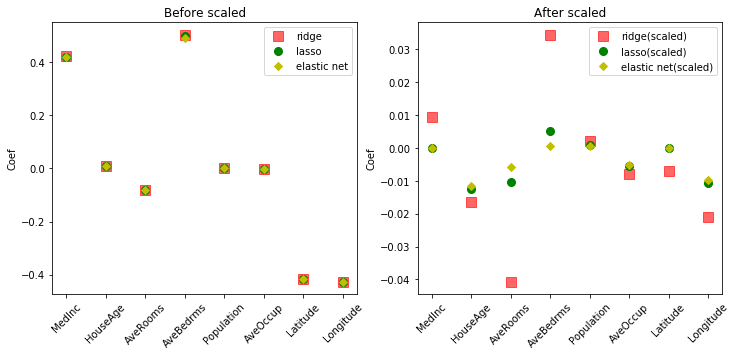

In [30]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(range(8),ridge.coef_,'rs',alpha=0.6,ms=10,label='ridge')
ax[0].plot(range(8),lasso.coef_,'go',ms=8,label='lasso')
ax[0].plot(range(8),EN.coef_,'yD',label='elastic net')
ax[0].set_xticklabels(cols[:-1].insert(0,''),rotation=45)
ax[0].set_ylabel('Coef')
ax[0].set_title('Before scaled')
ax[1].plot(range(8),ridge_scaled.coef_,'rs',alpha=0.6,ms=10,label='ridge(scaled)')
ax[1].plot(range(8),lasso_scaled.coef_,'go',ms=8,label='lasso(scaled)')
ax[1].plot(range(8),EN_scaled.coef_,'yD',label='elastic net(scaled)')
ax[1].set_xticklabels(cols[:-1].insert(0,''),rotation=45)
ax[1].set_ylabel('Coef')
ax[1].set_title('After scaled')
ax[0].legend();ax[1].legend()
plt.show()

**From the plot above we can see that:
For unscaled data, three models all agree on the importance of `MedInc` and `AveBedrms`.
However, for scaled data, there appears to be a disagreement, but they tend to agree on `AveBedrms` and `Population`.**